# EDA - Анализ данных мошенничества с кредитными картами
 
**Цель:** Исследовать датасет транзакций для понимания структуры данных, выявления паттернов и подготовки к моделированию.

## Описание датасета

Датасет содержит информацию о транзакциях по кредитными картами:
- **Источник:** Kaggle - Credit Card Fraud Detection Dataset 2023
- **Размер:** ~500,000+ записей
- **Целевая переменная:** `Class` (0 - нормальная транзакция, 1 - мошенничество)
- **Признаки:**
  - `V1-V28`: Анонимизированные PCA компоненты
  - `Amount`: Сумма транзакции
  - `id`: Уникальный идентификатор

## Структура анализа
1. Загрузка и первичный анализ данных
2. Анализ дисбаланса классов
3. Исследование признаков (V1-V28, Amount)
4. Корреляционный анализ
5. Выводы и рекомендации

In [1]:
# Автоматическая перезагрузка модулей при изменении
# Это позволяет обновлять код в helper.py, plots.py, nlp.py без перезапуска ядра
%load_ext autoreload
%autoreload 2

In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

# Настройки визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("✅ Библиотеки успешно загружены")

✅ Библиотеки успешно загружены


In [5]:
data_path = Path("../data/creditcard_2023.csv") 

print(f"Путь к файлу: {data_path.absolute()}")
print(f"Существует: {data_path.exists()}")

# Загружаем данные
df = pd.read_csv(data_path)
print(f"\n✅ Успешно загружено!")
print(f"📊 Размер датасета: {len(df):,} строк, {df.shape[1]} колонок")

# Покажем первые строки
print("\nПервые 5 строк:")
print(df.head())

Путь к файлу: C:\Data\credit-card-fraud-classification\notebooks\..\data\creditcard_2023.csv
Существует: True

✅ Успешно загружено!
📊 Размер датасета: 568,630 строк, 31 колонок

Первые 5 строк:
   id      V1      V2     V3      V4     V5     V6     V7      V8      V9  \
0   0 -0.2606 -0.4696 2.4963 -0.0837 0.1297 0.7329 0.5190 -0.1300  0.7272   
1   1  0.9851 -0.3560 0.5581 -0.4297 0.2771 0.4286 0.4065 -0.1331  0.3475   
2   2 -0.2603 -0.9494 1.7285 -0.4580 0.0741 1.4195 0.7435 -0.0956 -0.2613   
3   3 -0.1522 -0.5090 1.7468 -1.0902 0.2495 1.1433 0.5183 -0.0651 -0.2057   
4   4 -0.2068 -0.1653 1.5271 -0.4483 0.1061 0.5305 0.6588 -0.2127  1.0499   

     V10     V11    V12     V13    V14     V15     V16    V17    V18     V19  \
0 0.6377 -0.9870 0.2934 -0.9414 0.5490  1.8049  0.2156 0.5123 0.3336  0.1243   
1 0.5298  0.1401 1.5642  0.5741 0.6277  0.7061  0.7892 0.4038 0.2018 -0.3407   
2 0.6907 -0.2730 0.6592  0.8052 0.6169  3.0690 -0.5775 0.8865 0.2394 -2.3661   
3 0.5752 -0.7526 0.7375

In [6]:
print("📋 БАЗОВЫЙ АНАЛИЗ ДАННЫХ")
print("=" * 50)

# Информация о датасете
print("Информация о структуре:")
df.info()

# Проверка пропусков
print(f"\n🔍 Пропуски в данных: {df.isnull().sum().sum()} (0 = отлично!)")

📋 БАЗОВЫЙ АНАЛИЗ ДАННЫХ
Информация о структуре:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  

In [7]:
print("🎯 АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (Class)")
print("=" * 50)

# Распределение классов
class_counts = df['Class'].value_counts()
class_percentage = df['Class'].value_counts(normalize=True) * 100

print(f"Class 0 (нормальные): {class_counts[0]:,} транзакций ({class_percentage[0]:.4f}%)")
print(f"Class 1 (мошенничество): {class_counts[1]:,} транзакций ({class_percentage[1]:.4f}%)")

ratio = class_counts[0] / class_counts[1]
print(f"\n📈 Соотношение классов: {ratio:.2f}:1")
print(f"🎯 На 1 мошенническую операцию приходится {ratio:.0f} нормальных")

🎯 АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (Class)
Class 0 (нормальные): 284,315 транзакций (50.0000%)
Class 1 (мошенничество): 284,315 транзакций (50.0000%)

📈 Соотношение классов: 1.00:1
🎯 На 1 мошенническую операцию приходится 1 нормальных


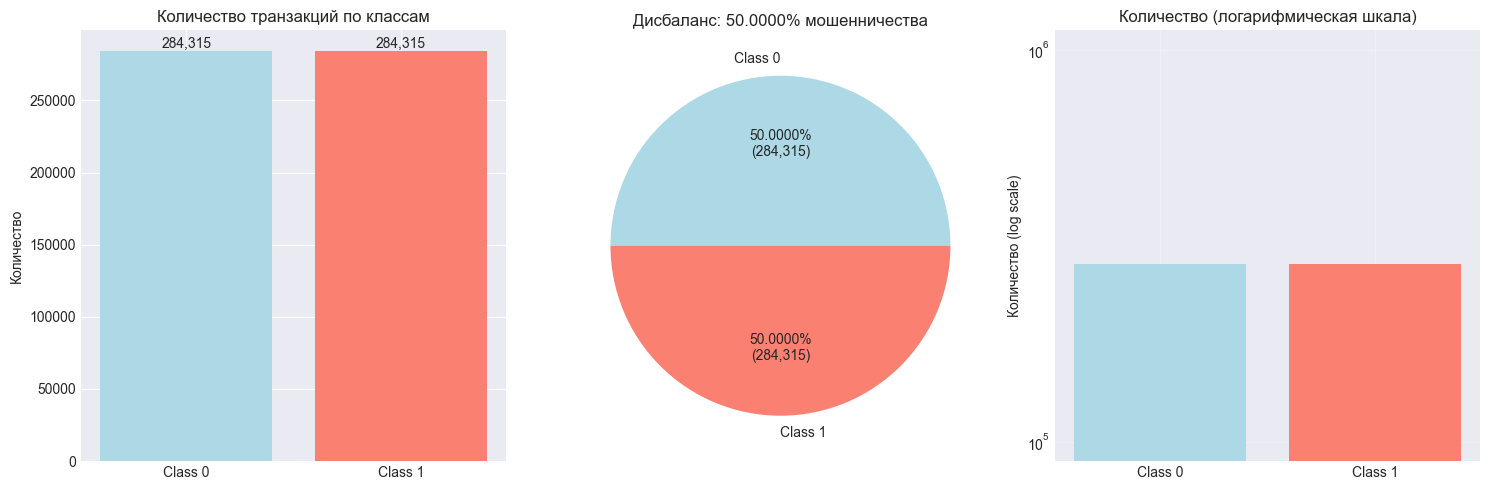

In [8]:
# Настройки графиков
plt.figure(figsize=(15, 5))

# 1. Столбчатая диаграмма
plt.subplot(1, 3, 1)
bars = plt.bar(['Class 0', 'Class 1'], class_counts.values, 
               color=['lightblue', 'salmon'])
plt.title('Количество транзакций по классам')
plt.ylabel('Количество')
# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,}', ha='center', va='bottom')

# 2. Круговая диаграмма
plt.subplot(1, 3, 2)
plt.pie(class_counts.values, labels=['Class 0', 'Class 1'],
        autopct=lambda pct: f'{pct:.4f}%\n({int(pct/100*len(df)):,})',
        colors=['lightblue', 'salmon'])
plt.title(f'Дисбаланс: {class_percentage[1]:.4f}% мошенничества')

# 3. Логарифмическая шкала
plt.subplot(1, 3, 3)
plt.bar(['Class 0', 'Class 1'], class_counts.values,
        color=['lightblue', 'salmon'])
plt.title('Количество (логарифмическая шкала)')
plt.ylabel('Количество (log scale)')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

💰 АНАЛИЗ СУММ ТРАНЗАКЦИЙ (Amount)
• Минимальная сумма: 50.01
• Максимальная сумма: 24039.93
• Средняя сумма: 12041.96
• Медианная сумма: 12030.15
• Стандартное отклонение: 6919.64


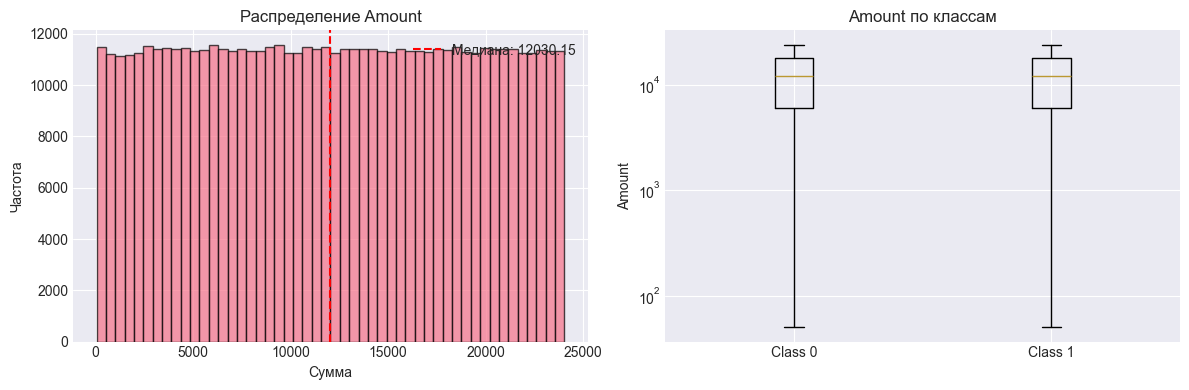

In [9]:
print("💰 АНАЛИЗ СУММ ТРАНЗАКЦИЙ (Amount)")
print("=" * 50)

# Основные статистики
amount_stats = df['Amount'].describe()
print(f"• Минимальная сумма: {amount_stats['min']:.2f}")
print(f"• Максимальная сумма: {amount_stats['max']:.2f}")
print(f"• Средняя сумма: {amount_stats['mean']:.2f}")
print(f"• Медианная сумма: {amount_stats['50%']:.2f}")
print(f"• Стандартное отклонение: {amount_stats['std']:.2f}")

# Визуализация
plt.figure(figsize=(12, 4))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(df['Amount'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение Amount')
plt.xlabel('Сумма')
plt.ylabel('Частота')
plt.axvline(df['Amount'].median(), color='red', linestyle='--', 
           label=f'Медиана: {df["Amount"].median():.2f}')
plt.legend()

# Boxplot по классам
plt.subplot(1, 2, 2)
df_class0 = df[df['Class'] == 0]
df_class1 = df[df['Class'] == 1]
box_data = [df_class0['Amount'].values, df_class1['Amount'].values]
plt.boxplot(box_data, labels=['Class 0', 'Class 1'])
plt.title('Amount по классам')
plt.ylabel('Amount')
plt.yscale('log')  # Логарифмическая шкала

plt.tight_layout()
plt.show()

🔬 АНАЛИЗ PCA КОМПОНЕНТ (V1-V28)
Всего V-фич: 28

📊 Основные статистики V-фич:
       mean    std      min      max
V1  -0.0000 1.0000  -3.4956   2.2290
V2  -0.0000 1.0000 -49.9666   4.3619
V3   0.0000 1.0000  -3.1838  14.1258
V4   0.0000 1.0000  -4.9512   3.2015
V5   0.0000 1.0000  -9.9528  42.7169
V6   0.0000 1.0000 -21.1111  26.1684
V7   0.0000 1.0000  -4.3518 217.8730
V8   0.0000 1.0000 -10.7563   5.9580
V9   0.0000 1.0000  -3.7519  20.2701
V10  0.0000 1.0000  -3.1633  31.7227

🔗 Корреляции V-фич с Class:
Топ-10 положительных корреляций:
Class   1.0000
V4      0.7360
V11     0.7243
V2      0.4919
V19     0.2441
V27     0.2140
V20     0.1799
V8      0.1443
V21     0.1096
V28     0.1020
Name: Class, dtype: float64

Топ-10 отрицательных корреляций:
V6    -0.4351
V17   -0.4764
V7    -0.4912
V1    -0.5058
V16   -0.5735
V9    -0.5855
V10   -0.6737
V3    -0.6821
V12   -0.7686
V14   -0.8057
Name: Class, dtype: float64


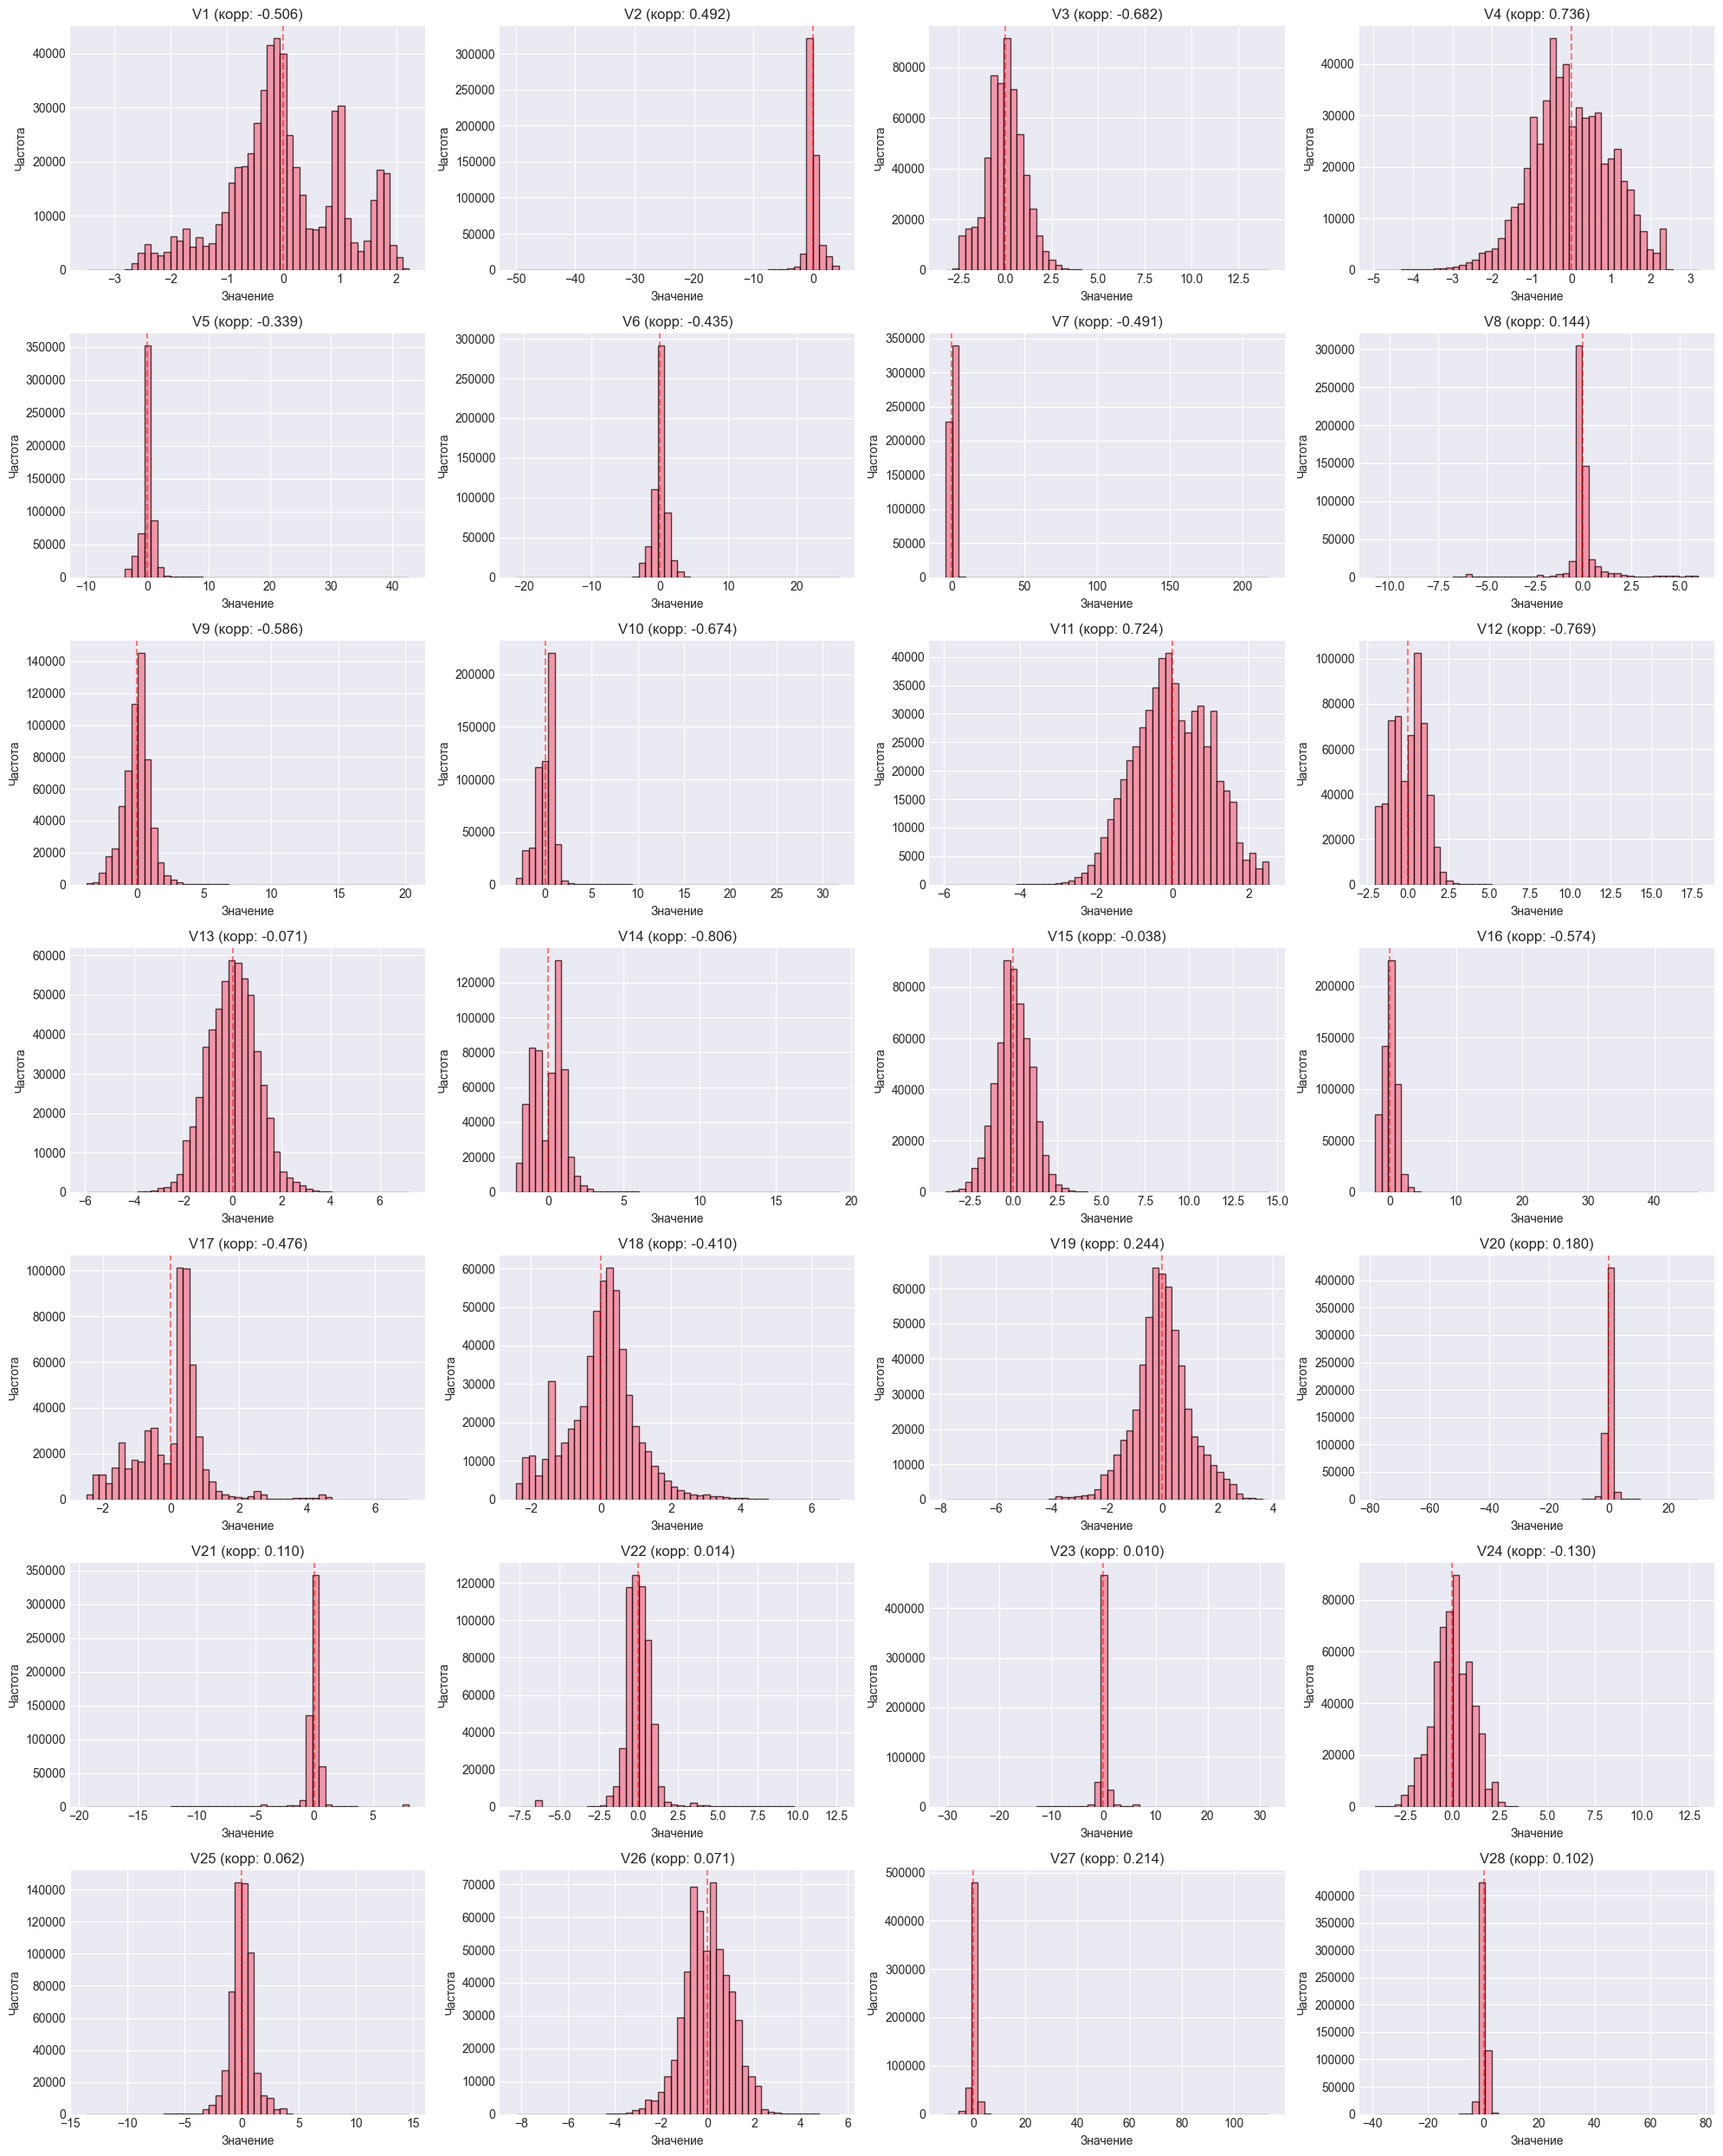

In [14]:
print("🔬 АНАЛИЗ PCA КОМПОНЕНТ (V1-V28)")
print("=" * 50)

# Собираем все V-колонки
v_columns = [f'V{i}' for i in range(1, 29)]

print(f"Всего V-фич: {len(v_columns)}")

# Статистики по V-фичам
print("\n📊 Основные статистики V-фич:")
v_stats = df[v_columns].agg(['mean', 'std', 'min', 'max']).T
print(v_stats.head(10))  # Первые 10

# Корреляции V-фич с Class
print("\n🔗 Корреляции V-фич с Class:")
v_correlations = df[v_columns + ['Class']].corr()['Class'].sort_values(ascending=False)
print("Топ-10 положительных корреляций:")
print(v_correlations.head(10))
print("\nТоп-10 отрицательных корреляций:")
print(v_correlations.tail(10))

# Визуализация распределений
fig, axes = plt.subplots(7, 4, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(v_columns):
    if i < len(axes):
        # Гистограммы для каждого V
        axes[i].hist(df[col], bins=50, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'{col} (корр: {v_correlations[col]:.3f})')
        axes[i].set_xlabel('Значение')
        axes[i].set_ylabel('Частота')
        # Вертикальная линия на среднем
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


🔗 ДЕТАЛЬНЫЙ АНАЛИЗ КОРРЕЛЯЦИЙ
Топ-10 фич по абсолютной корреляции с Class:
 1. V14: -0.8057
 2. V12: -0.7686
 3. V4: +0.7360
 4. V11: +0.7243
 5. V3: -0.6821
 6. V10: -0.6737
 7. V9: -0.5855
 8. V16: -0.5735
 9. V1: -0.5058
10. V2: +0.4919


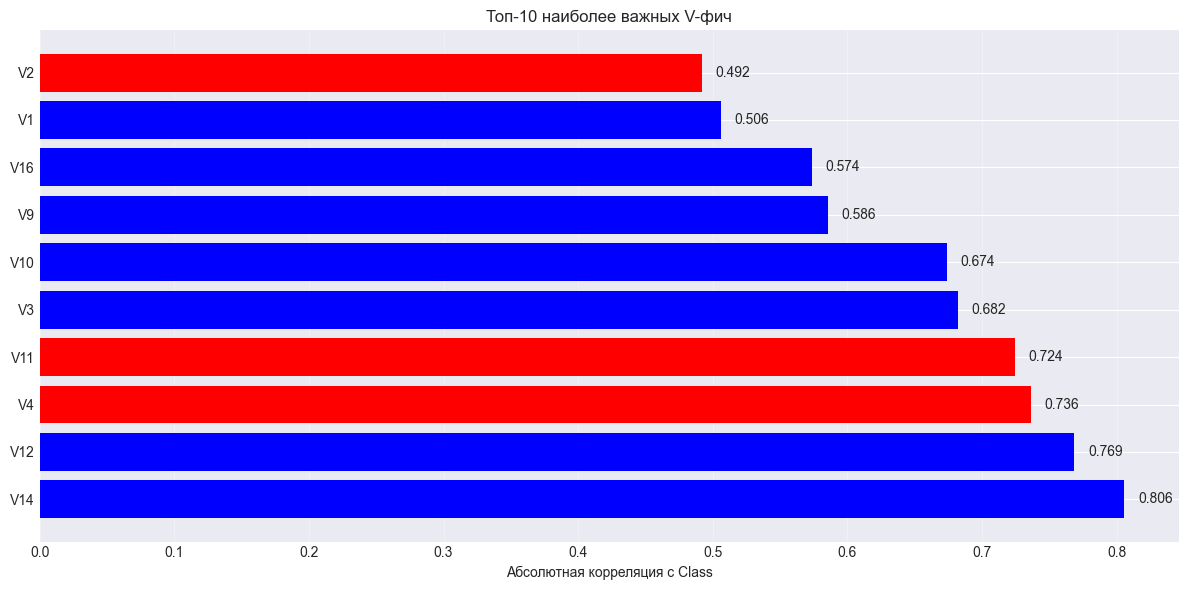

In [12]:
print("🔗 ДЕТАЛЬНЫЙ АНАЛИЗ КОРРЕЛЯЦИЙ")
print("=" * 60)

# Самые важные фичи по абсолютной корреляции
top_corr_abs = v_correlations.abs().sort_values(ascending=False)
print("Топ-10 фич по абсолютной корреляции с Class:")
for i, (feature, corr) in enumerate(top_corr_abs[1:11].items(), 1):
    sign = "+" if v_correlations[feature] > 0 else "-"
    print(f"{i:2}. {feature}: {sign}{abs(corr):.4f}")

# Визуализация топ-корреляций
plt.figure(figsize=(12, 6))
top_10 = top_corr_abs[1:11]
colors = ['red' if v_correlations[feature] > 0 else 'blue' for feature in top_10.index]

plt.barh(range(len(top_10)), top_10.values, color=colors)
plt.yticks(range(len(top_10)), top_10.index)
plt.xlabel('Абсолютная корреляция с Class')
plt.title('Топ-10 наиболее важных V-фич')
plt.grid(True, alpha=0.3, axis='x')

# Добавляем значения
for i, value in enumerate(top_10.values):
    plt.text(value + 0.01, i, f'{value:.3f}', va='center')

plt.tight_layout()
plt.show()

💰 СРАВНИТЕЛЬНЫЙ АНАЛИЗ AMOUNT ПО КЛАССАМ
Статистика Amount по классам:
• Class 0 - Среднее: 12026.31
• Class 1 - Среднее: 12057.60
• Разница: 31.29

📊 T-тест: t=-1.7048, p-value=0.088225
❌ Нет статистически значимой разницы


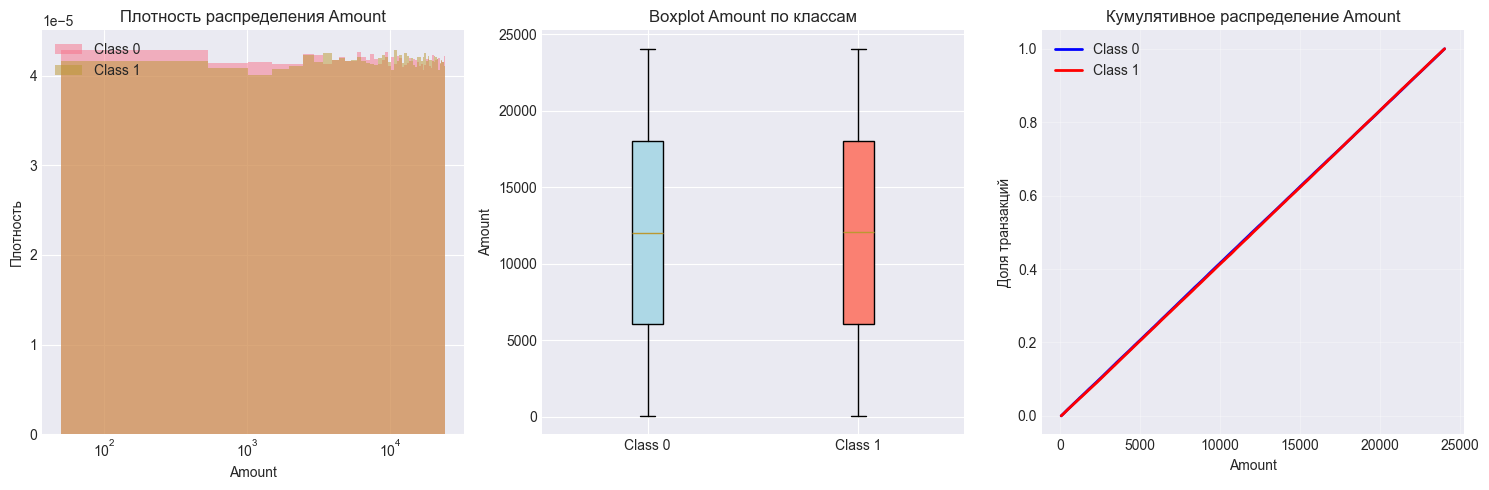

In [13]:
print("💰 СРАВНИТЕЛЬНЫЙ АНАЛИЗ AMOUNT ПО КЛАССАМ")
print("=" * 60)

from scipy import stats

# Статистический тест
t_stat, p_value = stats.ttest_ind(df_class0['Amount'], df_class1['Amount'])

print("Статистика Amount по классам:")
print(f"• Class 0 - Среднее: {df_class0['Amount'].mean():.2f}")
print(f"• Class 1 - Среднее: {df_class1['Amount'].mean():.2f}")
print(f"• Разница: {abs(df_class0['Amount'].mean() - df_class1['Amount'].mean()):.2f}")

print(f"\n📊 T-тест: t={t_stat:.4f}, p-value={p_value:.6f}")
if p_value < 0.05:
    print("✅ Статистически значимая разница (p < 0.05)")
else:
    print("❌ Нет статистически значимой разницы")

# Визуализация сравнения
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Гистограммы
axes[0].hist(df_class0['Amount'], bins=50, alpha=0.5, label='Class 0', density=True)
axes[0].hist(df_class1['Amount'], bins=50, alpha=0.5, label='Class 1', density=True)
axes[0].set_title('Плотность распределения Amount')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Плотность')
axes[0].legend()
axes[0].set_xscale('log')

# 2. Boxplot
box_data = [df_class0['Amount'].values, df_class1['Amount'].values]
bp = axes[1].boxplot(box_data, labels=['Class 0', 'Class 1'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('salmon')
axes[1].set_title('Boxplot Amount по классам')
axes[1].set_ylabel('Amount')

# 3. ECDF (Кумулятивное распределение)
for class_val, color, label in zip([0, 1], ['blue', 'red'], ['Class 0', 'Class 1']):
    subset = df[df['Class'] == class_val]['Amount'].sort_values()
    y = np.arange(1, len(subset) + 1) / len(subset)
    axes[2].plot(subset.values, y, color=color, label=label, linewidth=2)

axes[2].set_title('Кумулятивное распределение Amount')
axes[2].set_xlabel('Amount')
axes[2].set_ylabel('Доля транзакций')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
